In [24]:
import os

import numpy as np
import pandas as pd
import math
import matplotlib.pylab as plt
import seaborn as sns

%matplotlib inline
sns.set(style='ticks', palette='Set2')
!pip install graphviz


In [25]:
# Load data
path = "./churn2.csv"
df = pd.read_csv(path)[["COLLEGE", "INCOME", "OVERAGE", "LEFTOVER", "HOUSE","HANDSET_PRICE","OVER_15MINS_CALLS_PER_MONTH","AVERAGE_CALL_DURATION","REPORTED_SATISFACTION","REPORTED_USAGE_LEVEL","CONSIDERING_CHANGE_OF_PLAN","LEAVE"]].dropna()
# Take a look at the data
df.head(5)

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,LEAVE
0,zero,31953,0,6,313378,161,0,4,unsat,little,no,STAY
1,one,36147,0,13,800586,244,0,6,unsat,little,considering,STAY
2,one,27273,230,0,305049,201,16,15,unsat,very_little,perhaps,STAY
3,zero,120070,38,33,788235,780,3,2,unsat,very_high,considering,LEAVE
4,one,29215,208,85,224784,241,21,1,very_unsat,little,never_thought,STAY


In [26]:
df.dtypes

COLLEGE                        object
INCOME                          int64
OVERAGE                         int64
LEFTOVER                        int64
HOUSE                           int64
HANDSET_PRICE                   int64
OVER_15MINS_CALLS_PER_MONTH     int64
AVERAGE_CALL_DURATION           int64
REPORTED_SATISFACTION          object
REPORTED_USAGE_LEVEL           object
CONSIDERING_CHANGE_OF_PLAN     object
LEAVE                          object
dtype: object

In [27]:
# Transform COLLEGE column to a numeric variable
df["COLLEGE2"] = (df.COLLEGE == "one").astype(int)
#df.head(5)

In [28]:
df.REPORTED_SATISFACTION = df.REPORTED_SATISFACTION.astype('str')
df.REPORTED_USAGE_LEVEL = df.REPORTED_USAGE_LEVEL.astype('str')
df.CONSIDERING_CHANGE_OF_PLAN = df.CONSIDERING_CHANGE_OF_PLAN.astype('str')

In [29]:
df["LEAVE2"] = (df.LEAVE == "STAY").astype(int)
df = df.drop("LEAVE", axis="columns")
df = df.drop("COLLEGE", axis="columns")
df = pd.get_dummies(df)
df.head(5)

,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,COLLEGE2,LEAVE2,REPORTED_SATISFACTION_avg,...,REPORTED_USAGE_LEVEL_avg,REPORTED_USAGE_LEVEL_high,REPORTED_USAGE_LEVEL_little,REPORTED_USAGE_LEVEL_very_high,REPORTED_USAGE_LEVEL_very_little,CONSIDERING_CHANGE_OF_PLAN_actively_looking_into_it,CONSIDERING_CHANGE_OF_PLAN_considering,CONSIDERING_CHANGE_OF_PLAN_never_thought,CONSIDERING_CHANGE_OF_PLAN_no,CONSIDERING_CHANGE_OF_PLAN_perhaps
0,31953,0,6,313378,161,0,4,0,1,0,...,0,0,1,0,0,0,0,0,1,0
1,36147,0,13,800586,244,0,6,1,1,0,...,0,0,1,0,0,0,1,0,0,0
2,27273,230,0,305049,201,16,15,1,1,0,...,0,0,0,0,1,0,0,0,0,1
3,120070,38,33,788235,780,3,2,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,29215,208,85,224784,241,21,1,1,1,0,...,0,0,1,0,0,0,0,1,0,0


In [30]:
# Using all variables
predictor_cols = ['INCOME', 'OVERAGE', 'LEFTOVER', 'HOUSE', 'HANDSET_PRICE',
       'OVER_15MINS_CALLS_PER_MONTH', 'AVERAGE_CALL_DURATION', 'COLLEGE2',
       'REPORTED_SATISFACTION_avg', 'REPORTED_SATISFACTION_sat',
       'REPORTED_SATISFACTION_unsat', 'REPORTED_SATISFACTION_very_sat',
       'REPORTED_SATISFACTION_very_unsat', 'REPORTED_USAGE_LEVEL_avg',
       'REPORTED_USAGE_LEVEL_high', 'REPORTED_USAGE_LEVEL_little',
       'REPORTED_USAGE_LEVEL_very_high', 'REPORTED_USAGE_LEVEL_very_little',
       'CONSIDERING_CHANGE_OF_PLAN_actively_looking_into_it',
       'CONSIDERING_CHANGE_OF_PLAN_considering',
       'CONSIDERING_CHANGE_OF_PLAN_never_thought',
       'CONSIDERING_CHANGE_OF_PLAN_no', 'CONSIDERING_CHANGE_OF_PLAN_perhaps']

target_col = "LEAVE2"
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[predictor_cols],df[target_col],test_size = 0.25,random_state = 0)

In [31]:
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (15000, 23)
X_test shape: (5000, 23)
y_train shape: (15000,)
y_test shape: (5000,)


In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

lin_model = LogisticRegression(C = 100, max_iter = 2000)
lin_model.fit(X_train, y_train)
scores = cross_val_score(lin_model, X_train, y_train, cv = 10)

i = 0
for val in scores:
    i = i + 1 
    print("Fold ", i, ":\t", format(val, '.3f'))
    
print("Average error of cross validation score: {:.4f}".format(scores.std() / (10 ** (1/2))))
print("Std. dev of cross validation score: {:.4f}".format(scores.std()))
print("Average cross validation score: {:.4f}".format(scores.mean()))
print("Minimum of cross validation score: {:.4f}".format(scores.min()))

y_pred = lin_model.predict(X_test)
print("Test set score: {: 4f}".format(np.mean(y_pred == y_test)))

Fold  1 :	 0.602
Fold  2 :	 0.621
Fold  3 :	 0.611
Fold  4 :	 0.615
Fold  5 :	 0.646
Fold  6 :	 0.640
Fold  7 :	 0.644
Fold  8 :	 0.633
Fold  9 :	 0.631
Fold  10 :	 0.658
Average error of cross validation score: 0.0053
Std. dev of cross validation score: 0.0168
Average cross validation score: 0.6301
Minimum of cross validation score: 0.6020
Test set score:  0.644400


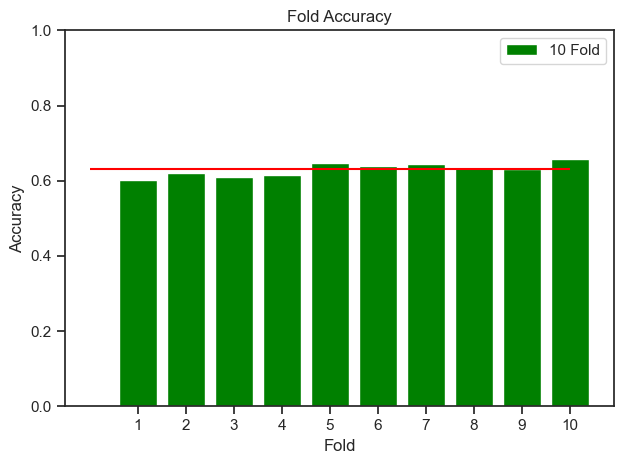

In [33]:
# Setting the range for the parameter (from 1 to 10)
parameter_range = np.arange(1, 11, 1)

 
plt.bar(parameter_range, scores,
         label="10 Fold", color='g')

plt.plot(scores.mean())
plt.hlines(scores.mean(),xmin=0,xmax=10,colors="red")

# Creating the plot
plt.title("Fold Accuracy")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.tight_layout()
plt.legend(loc='best')
plt.xticks(ticks=parameter_range)
plt.show()

In [34]:
#print("Number of columns in data frame = ", len(X_train.columns))
print('Logistic Regression coefficients:\n')
print("{:60}{:}".format("Variable: ", "Coefficient"))

count = 0

for col in X_train.columns:
    if(col == "LEAVE2"):
        break
    print("{:60}{:.6f}".format(col, lin_model.coef_[0][count]))

    count = count + 1
    
print("FINALLY printing the Intercept for Logistic Regression = ", lin_model.intercept_)

Logistic Regression coefficients:

Variable:                                                   Coefficient
INCOME                                                      -0.000003
OVERAGE                                                     -0.005851
LEFTOVER                                                    -0.000784
HOUSE                                                       0.000002
HANDSET_PRICE                                               -0.000399
OVER_15MINS_CALLS_PER_MONTH                                 -0.000540
AVERAGE_CALL_DURATION                                       -0.000016
COLLEGE2                                                    -0.000005
REPORTED_SATISFACTION_avg                                   0.000000
REPORTED_SATISFACTION_sat                                   0.000001
REPORTED_SATISFACTION_unsat                                 -0.000003
REPORTED_SATISFACTION_very_sat                              -0.000000
REPORTED_SATISFACTION_very_unsat                        

In [35]:
# Finally print the ODDS ratios for each of the independent variables
# The ODDS ratio os the increase in likelihood for a ONE unit increase in the independent variable
# The odds ratio is simply the exponent of the fitted coefficient
#print("Number of columns in data frame = ", len(X_train.columns))

print('Odds Ratios:\n')
print("{:60}{:}".format("Variable: ", "Odds Ratio"))
count = 0
for col in X_train.columns:
    # Do nothing if you have reached the last column since it contains the diagnosis (the Y variable)
    if(col == "LEAVE2"):
        count = count + 1
        break
    #print("ODDS Ratio for", col ,"=  ", np.exp(lin_model.coef_[0,count]),"\n")
    #print("ODDS Ratio for", col ,"=  ", np.exp(lin_model.coef_[0,count]),"\n")
    print("{:60}{:.6f}".format(col, np.exp(lin_model.coef_[0][count])))

    count = count + 1
    

Odds Ratios:

Variable:                                                   Odds Ratio
INCOME                                                      0.999997
OVERAGE                                                     0.994166
LEFTOVER                                                    0.999216
HOUSE                                                       1.000002
HANDSET_PRICE                                               0.999601
OVER_15MINS_CALLS_PER_MONTH                                 0.999460
AVERAGE_CALL_DURATION                                       0.999984
COLLEGE2                                                    0.999995
REPORTED_SATISFACTION_avg                                   1.000000
REPORTED_SATISFACTION_sat                                   1.000001
REPORTED_SATISFACTION_unsat                                 0.999997
REPORTED_SATISFACTION_very_sat                              1.000000
REPORTED_SATISFACTION_very_unsat                            0.999996
REPORTED_USAGE_LEV

Confusion matrix, without normalization
[[1517  907]
 [ 871 1705]]
Normalized confusion matrix
[[0.63 0.37]
 [0.34 0.66]]


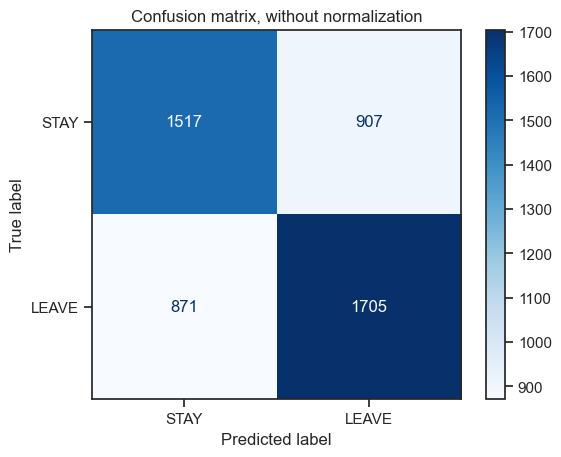

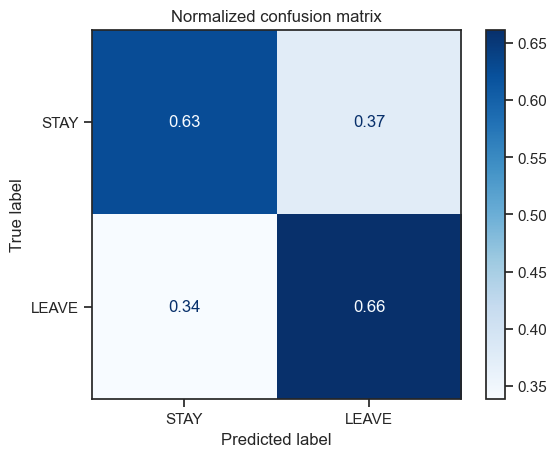

              precision    recall  f1-score   support

        STAY       0.64      0.63      0.63      2424
       LEAVE       0.65      0.66      0.66      2576

    accuracy                           0.64      5000
   macro avg       0.64      0.64      0.64      5000
weighted avg       0.64      0.64      0.64      5000



In [36]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn import datasets, metrics, model_selection, svm
import numpy as np

classifier = lin_model

#decision_tree = DecisionTreeClassifier(max_depth=6, criterion="entropy",max_leaf_nodes = 12, min_samples_leaf = 1) 
## Let's tell the model what is the data
probabilities = lin_model.predict_proba(X_test)[:, 1]
prediction = probabilities > 0.5



np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        display_labels=["STAY","LEAVE"],
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

scores = cross_val_score(classifier, X_train, y_train, cv = 10)

print(classification_report(y_test, y_pred, target_names=["STAY","LEAVE"]))

(0.0, 1.0)

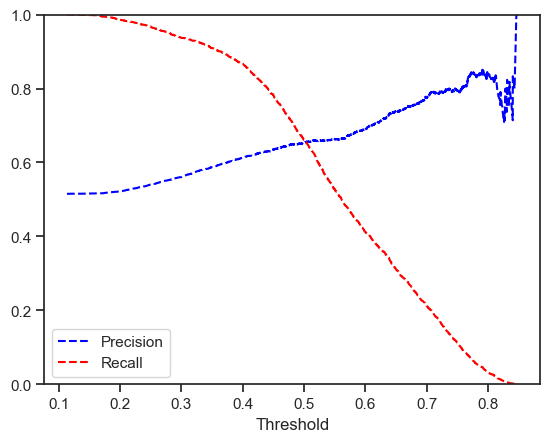

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve

#using precision and recall
#Precision - use it when fp (false positive) are important (i.e. you DONT want them, or as few as possible).
#Recall - use it when fn (false negative) are important (i.e. you DONT want them, or as few as possible).

lr = lin_model
y_scores = lr.predict_proba(X_test)
precision, recall, threshold = precision_recall_curve(y_test, y_scores[:, 1])

plt.plot(threshold, precision[:-1], 'b--', label='Precision')
plt.plot(threshold, recall[:-1], 'r--', label='Recall')
plt.xlabel('Threshold')
plt.legend(loc='lower left')
plt.ylim([0,1])

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.699


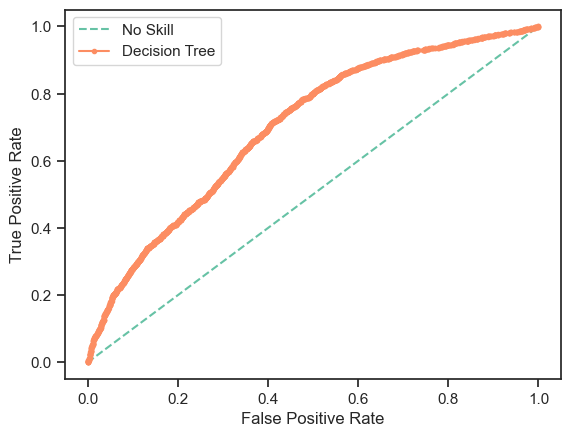

In [38]:
import matplotlib.pyplot as plt
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

trainX, testX, trainy, testy = X_train, X_test, y_train, y_test

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]
# fit a model
model = lin_model
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Decision Tree')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()